## Using Shift()

In [25]:
# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print (df1 + df2)
    
# Adding DataFrames with overlapping column names 
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print (df1 + df2)

# Adding DataFrames with overlapping row indexes
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print (df1.add(df2,fill_value=0))

# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):

    e1 = entries_and_exits.shift()
    return (entries_and_exits-e1)
get_hourly_entries_and_exits(entries_and_exits)


,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## Using applymap()

In [33]:
# DataFrame applymap()
if False:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print (df.applymap(add_one))
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grades(grades):
    if grades<= 59:
        return 'F'
    elif grades<=100 and grades >=90:
        return'A'
    elif grades<=89 and grades >=80:
        return 'B'
    elif grades<=79 and grades >=70:
        return 'C'
    elif grades<=699 and grades >=60:
        return 'D'
    
    return None
grades_df.applymap(convert_grades)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


## Apply() and standardize the variable

    standardize : mean =0, std variance =1
    apply applies function row or column wise as per the requirement

In [48]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print (convert_grades_curve(grades_df['exam1']))
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print (grades_df.apply(convert_grades_curve))
    
def standardize(df):
    df = (df-df.mean())/df.std(ddof=0)
    
    return df
grades_df.apply(standardize)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


## Apply continued
    argmax used

In [66]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})
# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if False:   
    print (df.apply(np.mean))
    print (df.apply(np.max))
    
def second_largest(df):

    l = df.argmax()
    df.iloc[l] = 0
    return df.max()
df.apply(second_largest)

a     4
b    40
c    20
dtype: int64

## Adding dataframe and a series
    adds corresponding values according to column names of df and the series indices. 

In [79]:
# Adding a Series to a square DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    print(s)
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding a Series to a one-row DataFrame 
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})# prints columns
    print(s)
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

# Adding a Series to a one-column DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    

    
# Adding when DataFrame column names match Series index
if False:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    print(s)
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


## Standardizing without using apply() 

In [45]:
import pandas as pd
# Adding using +
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df.axes)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding with axis='index'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df.add(s, axis='index'))
    # The functions sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df.add(s, axis='columns'))
    # The functions sub(), mul(), and div() work similarly to add()
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)


print(grades_df-grades_df.mean())
grades_df.mean(axis=0)
print(grades_df.sub(grades_df.mean(axis=1),axis=0),"\n",grades_df.mean(axis=1))

         exam1  exam2
Andre    -34.7  -33.4
Barry      3.3    5.6
Chris      0.3   -1.4
Dan       -2.7   -1.4
Emilio    11.3    9.6
Fred      -7.7   -6.4
Greta     13.3   21.6
Humbert  -12.7  -11.4
Ivan      20.3   14.6
James      9.3    2.6
         exam1  exam2
Andre      9.5   -9.5
Barry      9.0   -9.0
Chris     11.0  -11.0
Dan        9.5   -9.5
Emilio    11.0  -11.0
Fred       9.5   -9.5
Greta      6.0   -6.0
Humbert    9.5   -9.5
Ivan      13.0  -13.0
James     13.5  -13.5 
 Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64


## USING GROUPBY() 

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')
Populating the interactive namespace from numpy and matplotlib


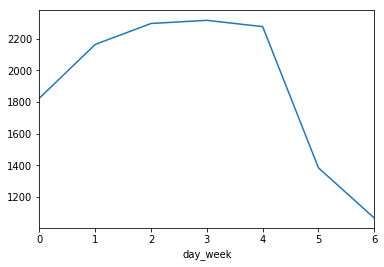

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if False:print (example_df)
    
# Examine groups
if False:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print (grouped_data.groups)
    
# Group by multiple columns
if False:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print (grouped_data.groups)
    
# Get sum of each group
if False:
    grouped_data = example_df.groupby('even')
    print (grouped_data.sum())
    
# Limit columns in result
if False:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print (grouped_data.sum()['value'])
    
    print ('\n') # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print (grouped_data['value'].sum())
    
subway_df = pd.read_csv('weather.csv')
print(subway_df.columns)
subway_df.groupby('TIMEn').mean()
%pylab inline
subway_df.groupby('day_week')['ENTRIESn_hourly'].mean().plot()

## Groupby on 

    Hourly entries and exits for each station

In [12]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Standardize each group
if True:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(standardize))
    
# Find second largest value in each group
if True:
    def second_largest(xs):
        sorted_xs = xs.sort_values(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(second_largest))

# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits(entries_and_exits):

    shifted = entries_and_exits.shift()
    return entries_and_exits-shifted
unit_grouped = ridership_df.groupby('UNIT')
unit_grouped['ENTRIESn','EXITSn'].apply(get_hourly_entries_and_exits)

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64
even
False    1
True     4
Name: value, dtype: int64


,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


## Merge

In [25]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
   
    
    return subway_df.merge(weather_df,on=['DATEn','hour','latitude','longitude'],how='inner')
de = combine_dfs(subway_df,weather_df)
de.head()

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0


## Plotting a dataframe

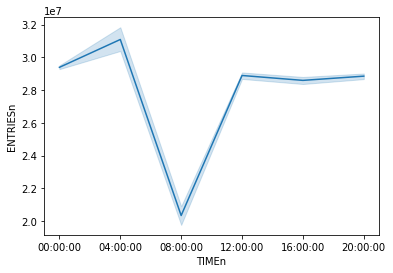

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for this block of code to see what it does

# groupby() without as_index
if False:
    first_even = example_df.groupby('even').first()
    print (first_even)
    print (first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame
    
# groupby() with as_index=False
if False:
    first_even = example_df.groupby('even', as_index=False).first()
    print (first_even)
    print (first_even['even']) # Now 'even' is still a column in the DataFrame

subway_df = pd.read_csv('weather.csv')
subway_df.head()
grouped = subway_df.groupby(['DATEn','TIMEn'],as_index=False).mean()
grouped.columns
sns.lineplot(x=grouped['TIMEn'],y=grouped['ENTRIESn'])


